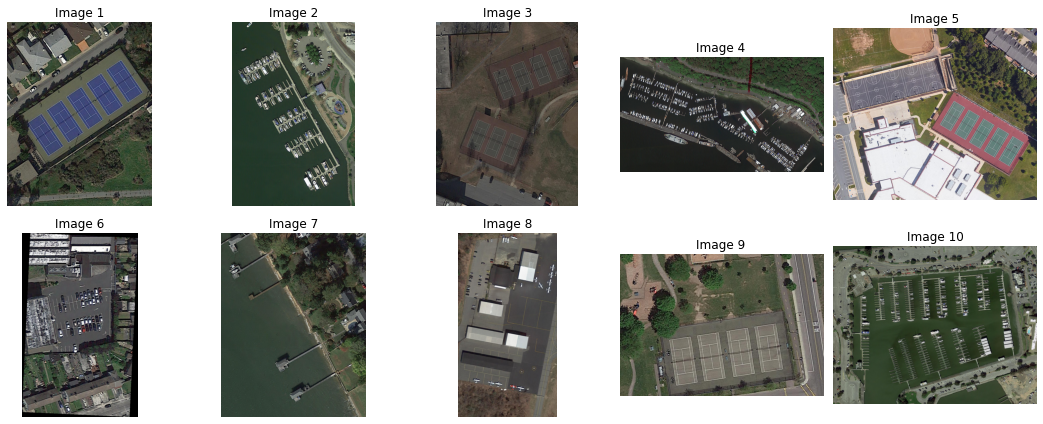

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your DOTA dataset images folder
image_folder = '/Users/shaner/Downloads/images'

# List all image files in the directory
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Set up a grid (e.g., 2 rows and 5 columns for the first 10 images)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through the first 10 images and display them in the grid
for i, image_file in enumerate(image_files[:10]):
    img_path = os.path.join(image_folder, image_file)
    img = Image.open(img_path)

    # Get the current axis in the grid
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Image {i+1}")
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

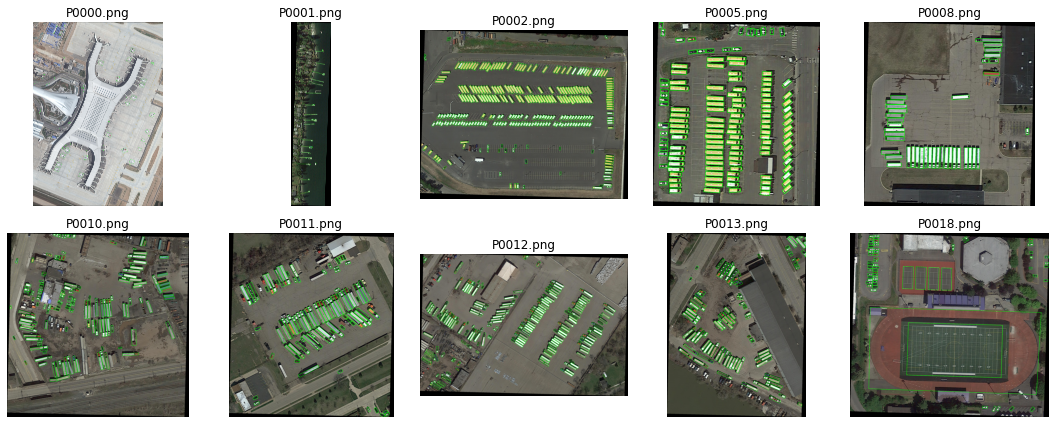

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# define file paths
image_dir = '/Users/shaner/Downloads/images'  # adjust based on setup
annotations_dir = '/Users/shaner/Downloads/labelTxt'  # where the annotation files are stored

# function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, annotation_path):
    # read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None

    # read annotation file
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # draw each bounding box
    for line in lines:
        # parse the bounding box coordinates; DOTA format is usually [x1, y1, x2, y2, x3, y3, x4, y4, class, difficulty]
        coords = line.strip().split()
        if len(coords) < 8:  # check if there are enough coordinates
            continue
        x1, y1, x2, y2, x3, y3, x4, y4 = map(int, coords[:8])

        # draw lines between points
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.line(image, (x2, y2), (x3, y3), (0, 255, 0), 2)
        cv2.line(image, (x3, y3), (x4, y4), (0, 255, 0), 2)
        cv2.line(image, (x4, y4), (x1, y1), (0, 255, 0), 2)

    # convert BGR to RGB for displaying in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# process the first 10 images with their annotations
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])[:10]

# initialize a grid for 10 images (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()  # flatten the axes array for easy indexing

for idx, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    annotation_file = os.path.join(annotations_dir, image_file.replace('.png', '.txt'))
    
    if os.path.exists(annotation_file):
        image_rgb = draw_bounding_boxes(image_path, annotation_file)
        if image_rgb is not None:
            axes[idx].imshow(image_rgb)
            axes[idx].axis('off')
            axes[idx].set_title(image_file)
    else:
        axes[idx].axis('off')
        axes[idx].set_title(f"Missing: {image_file}")

# hide any unused subplots if there are fewer than 10 images
for i in range(len(image_files), 10):
    axes[i].axis('off')

plt.tight_layout()
plt.show()